In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [10]:
data=pd.read_csv('cluster.csv')
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [11]:
x= data.iloc[:,[3,4]].values


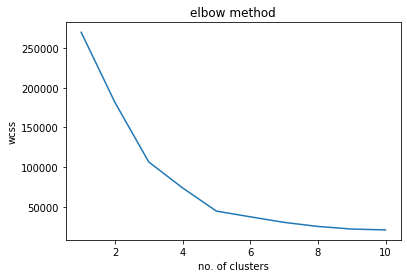

In [15]:
#using elbow method to find appropriate no.of clusters
wcss= []
for i in range(1,11) :
    kmeans= KMeans(n_clusters= i, init='k-means++', max_iter= 300 , n_init= 10 , random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('elbow method')
plt.xlabel('no. of clusters')
plt.ylabel('wcss')
plt.show()

In [16]:
#applying k means to dataset
kmeans= KMeans(n_clusters=5 , init='k-means++', max_iter=300 , n_init=10, random_state=0)
y_kmeans= kmeans.fit_predict(x)

In [17]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

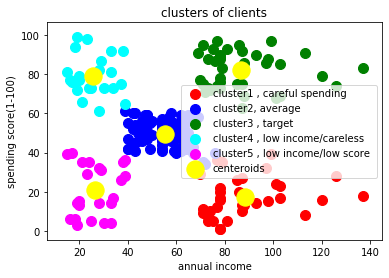

In [20]:
plt.scatter(x[y_kmeans==0 ,0], x[y_kmeans==0,1] , s=100 , c='red' , label='cluster1 , careful spending')
plt.scatter(x[y_kmeans==1 ,0], x[y_kmeans==1,1] , s=100 , c='blue' , label='cluster2, average')
plt.scatter(x[y_kmeans==2 ,0], x[y_kmeans==2,1] , s=100 , c='green' , label='cluster3 , target')
plt.scatter(x[y_kmeans==3 ,0], x[y_kmeans==3,1] , s=100 , c='cyan' , label='cluster4 , low income/careless ')
plt.scatter(x[y_kmeans==4 ,0], x[y_kmeans==4,1] , s=100 , c='magenta' , label='cluster5 , low income/low score ')

plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1],s=300 , c='yellow' , label='centeroids')
plt.title('clusters of clients')
plt.xlabel('annual income')
plt.ylabel('spending score(1-100)')
plt.legend()
plt.show()

